# Loading the data

    * Loading and removing user handles from tweets
    * Tokenize tweets
    * Removing stopwords (including punctuation marks and other apostrophe characters)
    * Stemming words
    


In [1]:
#1 - Glimpse of user-tweets
# import packagesa
import pandas as pd
import numpy as np
columns = ['target','ids','date','flag','user','text']

# load zip file
data = pd.read_csv('twitter.zip', encoding = 'latin-1', header= None)

# rename columns
data.columns = columns

# take only sample of data\
data = data.sample(n=500000, random_state = 22)


# shape of data

data.head()
# first 5 rows of data




,target,ids,date,flag,user,text
1013875,4,1881370700,Fri May 22 04:27:56 PDT 2009,NO_QUERY,FreshPlastic,#followfriday @foyboy 1) She had Skips on her ...
1064419,4,1964672525,Fri May 29 14:36:52 PDT 2009,NO_QUERY,CarebearJK,@PaulaAbdul we are finally starting to see the...
290763,0,1995464536,Mon Jun 01 13:31:56 PDT 2009,NO_QUERY,jessicabalicki,w. all my old coworkers going to the wake RIP...
770144,0,2301890082,Tue Jun 23 16:03:01 PDT 2009,NO_QUERY,dlphntat,"yeah, Bravo TV. I so wanna learn more about th..."
1266526,4,1999668574,Mon Jun 01 20:36:58 PDT 2009,NO_QUERY,stevefroisland,"@JCTrick Thanks, J! I think I'm almost getting..."


# Tackling user handles
**Don't need the tags or user handles that people use in tweets like '*@brandon* was so high last night'**

In [2]:
#2 - Remove user handles and punctuations
# import packages
import numpy as np
import re

# function to remove user handles
def remove_pattern(input_txt, pattern):
    r= re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '',input_txt)
    return input_txt


# remove user handles
data['clean_text'] = data['text'].apply(lambda row: remove_pattern(row,'@[\w]*'))



# first five observations
data.head()





,target,ids,date,flag,user,text,clean_text
1013875,4,1881370700,Fri May 22 04:27:56 PDT 2009,NO_QUERY,FreshPlastic,#followfriday @foyboy 1) She had Skips on her ...,#followfriday 1) She had Skips on her face ea...
1064419,4,1964672525,Fri May 29 14:36:52 PDT 2009,NO_QUERY,CarebearJK,@PaulaAbdul we are finally starting to see the...,we are finally starting to see the sun and wa...
290763,0,1995464536,Mon Jun 01 13:31:56 PDT 2009,NO_QUERY,jessicabalicki,w. all my old coworkers going to the wake RIP...,w. all my old coworkers going to the wake RIP...
770144,0,2301890082,Tue Jun 23 16:03:01 PDT 2009,NO_QUERY,dlphntat,"yeah, Bravo TV. I so wanna learn more about th...","yeah, Bravo TV. I so wanna learn more about th..."
1266526,4,1999668574,Mon Jun 01 20:36:58 PDT 2009,NO_QUERY,stevefroisland,"@JCTrick Thanks, J! I think I'm almost getting...","Thanks, J! I think I'm almost getting the han..."


In [3]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

NameError: name 'nltk' is not defined

# Preprocessing the data

In [4]:
#3 - Removing stopwords and performing stemming
# import packages
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]

# tokenize
data['tokenized_text'] = data['clean_text'].apply(lambda x: nltk.word_tokenize(x))

data['tokenized_text'] = data['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words] )
# stopword removal

stemmer = PorterStemmer()
data['tokenized_text'] =data['tokenized_text'] .apply(lambda x: [stemmer.stem(i) for i in x]) 
# stemming words

data['tokenized_text'] =data['tokenized_text'] .apply(lambda x: ' '.join(x))

print(data.head())



         target         ids                          date      flag  \
1013875       4  1881370700  Fri May 22 04:27:56 PDT 2009  NO_QUERY   
1064419       4  1964672525  Fri May 29 14:36:52 PDT 2009  NO_QUERY   
290763        0  1995464536  Mon Jun 01 13:31:56 PDT 2009  NO_QUERY   
770144        0  2301890082  Tue Jun 23 16:03:01 PDT 2009  NO_QUERY   
1266526       4  1999668574  Mon Jun 01 20:36:58 PDT 2009  NO_QUERY   

                   user                                               text  \
1013875    FreshPlastic  #followfriday @foyboy 1) She had Skips on her ...   
1064419      CarebearJK  @PaulaAbdul we are finally starting to see the...   
290763   jessicabalicki  w. all my old coworkers going to the wake  RIP...   
770144         dlphntat  yeah, Bravo TV. I so wanna learn more about th...   
1266526  stevefroisland  @JCTrick Thanks, J! I think I'm almost getting...   

                                                clean_text  \
1013875  #followfriday  1) She had Skips o

# Finding out most common words using wordcloud

In [ ]:
!pip install wordcloud

In [5]:
#4 - printing a wordcloud
# import packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# all the tweets
all_words = ' '.join([text for text in data['tokenized_text']])


# generate wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)


# plot wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<Figure size 1000x700 with 1 Axes>

### **Frequent words in Positive and Negative tweets**

POSITIVE TWEETS 


(-0.5, 799.5, 499.5, -0.5)

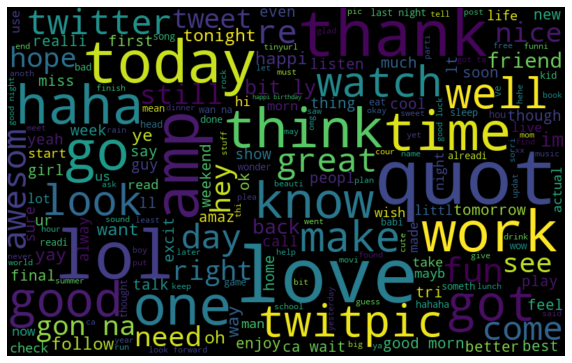

In [6]:
# positive tweets
pos_words =' '.join([text for text in data['tokenized_text'][data['target'] == 4]])

# generate wordcloud object for positive tweets
print('POSITIVE TWEETS ')
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)

plt.figure(figsize=(10, 7))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis('off')

**As you can see above from the visualization, words like "thank", "lol", "twitter", "work" , "love" are more prominent throughout *POSITIVE* tweets.**

NEGATIVE TWEETS 


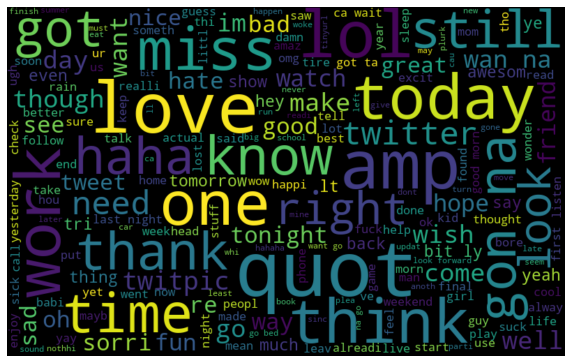

In [7]:
# negative tweets
neg_words = ' '.join(data['tokenized_text'][data['target'] == 0])

# generate wordcloud object for negative tweets
negwordcloud = WordCloud(width = 800, height= 500, random_state=21,max_font_size=110).generate(neg_words)

print('NEGATIVE TWEETS ')
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**As you can see above from the visualization, words like "today", "one", "quot", "miss" , "love" are more prominent throughout *NEGATIVE* tweets.**

# Classifying tweets

    * Splitting into training and test sets
    * Construct a term-document matrix (can be done by Bag of Words or TF-IDF)
    * Fitting a classifier on training data
    * Predicting on test data
    * Evaluating classifier performance


In [8]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# ratio to split into training and test set
ratio = int(len(data)*0.75)

# logistic regression model
logreg = LogisticRegression(random_state=2)

# Code starts here

# TF-IDF feature matrix
tfidf_vectorizer = TfidfVectorizer(stop_words= 'english', max_features=1000, max_df=0.90, min_df=2)

# fit and transform tweets
tweets = tfidf_vectorizer.fit_transform(data['tokenized_text'])

# convert positive tweets to 1's
data['target'][data['target']==4] = 1

# split into train and test
X_train = tweets[:ratio,:]
X_test = tweets[ratio:,:]
y_train =data['target'].iloc[:ratio] 
y_test = data['target'].iloc[ratio:]

# fit on training data
logreg.fit(X_train, y_train)

# make predictions
prediction = logreg.predict_proba(X_test)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
# print out accuracy
accuracy = accuracy_score(y_test,prediction_int)
print('The accuracy is', accuracy)


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy is 0.705448


In [9]:
data['target'].value_counts()

0    250328
1    249672
Name: target, dtype: int64

# Sentiment Analysis with TextBlob

In [10]:
# # import textblob
# from textblob import TextBlob
# # convert string to textblob object
# text = TextBlob("The alumni network is very strong!")
# print(text[:5])
# # extract tags
# tags = text.tags
# print(tags)
# # tokenize sentence
# tokens = text.words
# print(tokens)
# # lemmatize every word
# lemmas = [Word(i).lemmatize() for i in text.words]
# print(lemmas)
# text = TextBlob("The alumni network is very strong!")
# print(text.sentiment)

In [ ]:
!pip install textblob

In [11]:
# import packages
from textblob import TextBlob

# list to store polarities
tb_polarity=[]

# loop over tweets
for i in data['tokenized_text']:
    temp = TextBlob(i)
    tb_polarity.append(temp.sentiment[0])

# new column to store polarity    
data['tb_polarity']= tb_polarity
data.head()



,target,ids,date,flag,user,text,clean_text,tokenized_text,tb_polarity
1013875,1,1881370700,Fri May 22 04:27:56 PDT 2009,NO_QUERY,FreshPlastic,#followfriday @foyboy 1) She had Skips on her ...,#followfriday 1) She had Skips on her face ea...,followfriday 1 she skip face earlier week 2 na...,0.366667
1064419,1,1964672525,Fri May 29 14:36:52 PDT 2009,NO_QUERY,CarebearJK,@PaulaAbdul we are finally starting to see the...,we are finally starting to see the sun and wa...,final start see sun warm weather yipe,0.300000
290763,0,1995464536,Mon Jun 01 13:31:56 PDT 2009,NO_QUERY,jessicabalicki,w. all my old coworkers going to the wake RIP...,w. all my old coworkers going to the wake RIP...,w. old cowork go wake rip michel xoxo,0.100000
770144,0,2301890082,Tue Jun 23 16:03:01 PDT 2009,NO_QUERY,dlphntat,"yeah, Bravo TV. I so wanna learn more about th...","yeah, Bravo TV. I so wanna learn more about th...",yeah bravo TV I wan na learn real housew orang...,0.000000
1266526,1,1999668574,Mon Jun 01 20:36:58 PDT 2009,NO_QUERY,stevefroisland,"@JCTrick Thanks, J! I think I'm almost getting...","Thanks, J! I think I'm almost getting the han...",thank J I think I 'm almost get hang,0.000000


# Sentiment Analysis using vaderSentiment library
*Valence Aware Dictionary and sEntiment Reasoner.*

In [13]:
!pip install vaderSentiment

In [15]:
# import packages
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# initialize analyser object
analyser = SentimentIntensityAnalyzer()

# empty list to store VADER polarities
vs_polarity=[]

# loop over tweets

for sentence in data['tokenized_text']:
    temp = analyser.polarity_scores(sentence)['compound']
    vs_polarity.append(temp)


# add new column `'vs_polarity'` to data
data['vs_polarity'] = vs_polarity

print(data.head())

         target         ids                          date      flag  \
1013875       1  1881370700  Fri May 22 04:27:56 PDT 2009  NO_QUERY   
1064419       1  1964672525  Fri May 29 14:36:52 PDT 2009  NO_QUERY   
290763        0  1995464536  Mon Jun 01 13:31:56 PDT 2009  NO_QUERY   
770144        0  2301890082  Tue Jun 23 16:03:01 PDT 2009  NO_QUERY   
1266526       1  1999668574  Mon Jun 01 20:36:58 PDT 2009  NO_QUERY   

                   user                                               text  \
1013875    FreshPlastic  #followfriday @foyboy 1) She had Skips on her ...   
1064419      CarebearJK  @PaulaAbdul we are finally starting to see the...   
290763   jessicabalicki  w. all my old coworkers going to the wake  RIP...   
770144         dlphntat  yeah, Bravo TV. I so wanna learn more about th...   
1266526  stevefroisland  @JCTrick Thanks, J! I think I'm almost getting...   

                                                clean_text  \
1013875  #followfriday  1) She had Skips o

In [16]:
round(data.iloc[0,-1],2) == 0.46

True